In [1]:
from import_modules import *
from util import *
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
image_array = load_image_npy("../data/image_cluster/image.npy")
test_case_df = load_test_case_csv("../data/image_cluster/test_case.csv")

In [3]:
# mean
'''
image_mean = np.mean(image_array, axis=0)
'''

'\nimage_mean = np.mean(image_array, axis=0)\n'

In [4]:
# scatter matrix
'''
S = np.zeros([image_array.shape[1], image_array.shape[1]])
for vector in image_array:
    vector = vector - image_mean
    S += vector.reshape(-1, 1).dot(vector.reshape(1, -1))
# covariance
image_cov = np.cov(image_array, ddof=1)
'''

'\nS = np.zeros([image_array.shape[1], image_array.shape[1]])\nfor vector in image_array:\n    vector = vector - image_mean\n    S += vector.reshape(-1, 1).dot(vector.reshape(1, -1))\n# covariance\nimage_cov = np.cov(image_array, ddof=1)\n'

In [54]:
# tsne dimension reduction
#reduced_image_array = TSNE(n_components=3, verbose=1, n_iter=300).fit_transform(image_array)
# PCA
pca = PCA(n_components=100)
pca.fit(image_array)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
image_reduced = pca.transform(image_array)

In [56]:
image_reduced.shape

(140000, 100)

In [48]:
# Using K-means
kmeans = KMeans(n_clusters=2).fit(image_reduced)


In [49]:
# load 
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [50]:
index2label = {index:label for index, label in enumerate(kmeans.labels_)}

In [51]:
len(index2label)

140000

In [52]:
ans = [None] * test_case_df.shape[0]
for row in test_case_df.itertuples():
    if index2label[row[2]] == index2label[row[3]]:
        ans[index] = 1
    else:
        ans[index] = 0

In [23]:
# print to csv
def print_to_csv(y_, filename):
    data = [[index, issame] for index, issame in enumerate(y_)]
    df = pd.DataFrame(data=data, columns=["ID", "Ans"])
    df.to_csv(filename, index=False)

In [53]:
print_to_csv(ans, "testout_300dim_using_pca")

In [17]:
for row in test_case_df.itertuples():
    print(row)
    break

Pandas(Index=0, ID=0, image1_index=17874, image2_index=20452)


In [27]:
# check PCA transform
%matplotlib inline
from matplotlib import pyplot as plt

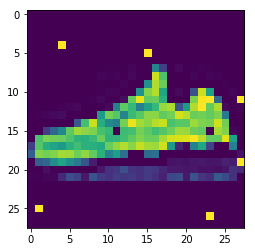

In [57]:
plt.imshow(image_array[10000].reshape(28, 28))

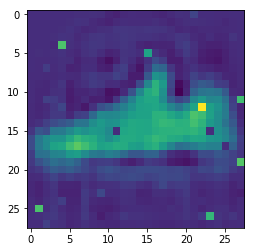

In [58]:
plt.imshow(pca.inverse_transform(image_reduced[10000]).reshape(28, 28))